In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", message="The default of observed=False is deprecated")

In [41]:
Superstore = pd.read_csv(r'C:\Users\Марат\Jupiter projects\research analysis\Sample - Superstore.csv', sep = ',', encoding = 'ISO-8859-1')

In [42]:
Superstore['Order Date'] = Superstore['Order Date'].astype('datetime64[ns]')
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [43]:
Superstore['year'] = Superstore['Order Date'].dt.year
Superstore['month'] = Superstore['Order Date'].dt.month
Superstore['day'] = Superstore['Order Date'].dt.day

In [44]:
# 1) распределение клиентской базы
# по географическому признаку: Country, City, State, Region
Country = Superstore.groupby('Country').agg({'Customer ID':'count'}).reset_index()
City = Superstore.groupby('City').agg({'Customer ID':'count'}).sort_values(by = 'Customer ID', ascending = False).reset_index()
State = Superstore.groupby(['year','State']).agg({'Customer ID':'count', 'Sales':'sum'}).sort_values(by = 'Customer ID', ascending = False).reset_index()
Region = Superstore.groupby('Region').agg({'Customer ID':'count'}).sort_values(by = 'Customer ID', ascending = False).reset_index()

print(
    f'\033[1mСегментация по стране:\033[0m',
    f'{Country}',
    f'\033[1mСегментация по регионам:\033[0m',
    f'{Region}',
    f'\033[1mСегментация по штатам:\033[0m',
    f'{State}',
    f'\033[1mСегментация по городам:\033[0m',
    f'{City}',
    sep='\n\n'
)

Сегментация по стране:

         Country  Customer ID
0  United States         9994

Сегментация по регионам:

    Region  Customer ID
0     West         3203
1     East         2848
2  Central         2323
3    South         1620

Сегментация по штатам:

     year                 State  Customer ID        Sales
0    2017            California          663  146388.3445
1    2016            California          526  131551.9115
2    2014            California          415   91303.5310
3    2015            California          397   88443.8445
4    2017              New York          352   93922.9950
..    ...                   ...          ...          ...
176  2014                  Iowa            2    1190.8400
177  2015               Vermont            2    5120.1000
178  2017  District of Columbia            2      77.7600
179  2016                 Maine            2     547.3300
180  2016               Wyoming            1    1603.1360

[181 rows x 4 columns]

Сегментация по городам:

In [45]:
# так как датасет сам разделяет клиентов по полю Segment посмотрим как они разделяются в самом датасете
user_segment = Superstore.groupby('Segment').agg({'Customer ID':'count'}).reset_index()
user_segment

,Segment,Customer ID
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [46]:
# создадим столбец с категорией товаров на основе прибыли и посмотрим количество пользователей в каждом сегменте
Superstore['Profit Category'] = ''

Superstore.loc[Superstore['Profit'] <= 1.728750, 'Profit Category'] = 'Lower' # изучить метод query
Superstore.loc[(Superstore['Profit'] > 1.728750) & (Superstore['Profit'] <= 8.666500), 'Profit Category'] = 'Middle'
Superstore.loc[(Superstore['Profit'] > 8.666500) & (Superstore['Profit'] <= 29.364000), 'Profit Category'] = 'High'
Superstore.loc[Superstore['Profit'] > 29.364000, 'Profit Category'] = 'Very High'

Superstore.loc[:, ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Segment', 'Country', 'City', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Profit', 'Quantity', 'Profit Category']]

,Row ID,Order ID,Order Date,Ship Date,Customer ID,Segment,Country,City,Region,Category,Sub-Category,Product Name,Sales,Profit,Quantity,Profit Category
0,1,CA-2016-152156,2016-11-08,11/11/2016,CG-12520,Consumer,United States,Henderson,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,41.9136,2,Very High
1,2,CA-2016-152156,2016-11-08,11/11/2016,CG-12520,Consumer,United States,Henderson,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,219.5820,3,Very High
2,3,CA-2016-138688,2016-06-12,6/16/2016,DV-13045,Corporate,United States,Los Angeles,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6.8714,2,Middle
3,4,US-2015-108966,2015-10-11,10/18/2015,SO-20335,Consumer,United States,Fort Lauderdale,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,-383.0310,5,Lower
4,5,US-2015-108966,2015-10-11,10/18/2015,SO-20335,Consumer,United States,Fort Lauderdale,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.5164,2,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,TB-21400,Consumer,United States,Miami,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,4.1028,3,Middle
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,DB-13060,Consumer,United States,Costa Mesa,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,15.6332,2,High
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,DB-13060,Consumer,United States,Costa Mesa,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,19.3932,2,High
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,DB-13060,Consumer,United States,Costa Mesa,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,13.3200,4,High


In [47]:
profit_category = Superstore.groupby('Profit Category').agg(
    Total_customer = ('Customer ID', 'count'),
    Total_profit = ('Profit', 'sum')
    ).reset_index()
profit_category = profit_category.sort_values('Total_customer', ascending = False)
print('Количество клиентов по категориям товаров на основе прибыли: ')
profit_category

Количество клиентов по категориям товаров на основе прибыли: 


,Profit Category,Total_customer,Total_profit
0,High,2501,41011.4636
1,Lower,2499,-155564.4284
2,Middle,2498,12149.9140
3,Very High,2496,388800.0725


In [48]:
# количество клиентов по категориям и подкатегориям товаров
Sub_Category = (
    Superstore.groupby(['Category', 'Sub-Category'])
    .agg(Total_customers = ('Customer ID', 'count'))
    .reset_index()
                        )

Category = (
    Sub_Category.groupby('Category')
    .agg(Total_customers = ('Total_customers', 'sum'))
    .assign(**{'Sub-Category':'Total'})
    .reset_index()
                        )

product_segmentation = pd.concat([Sub_Category, Category], ignore_index=True)
product_segmentation = product_segmentation.sort_values(['Category', 'Sub-Category'])
product_segmentation

,Category,Sub-Category,Total_customers
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
17,Furniture,Total,2121
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217


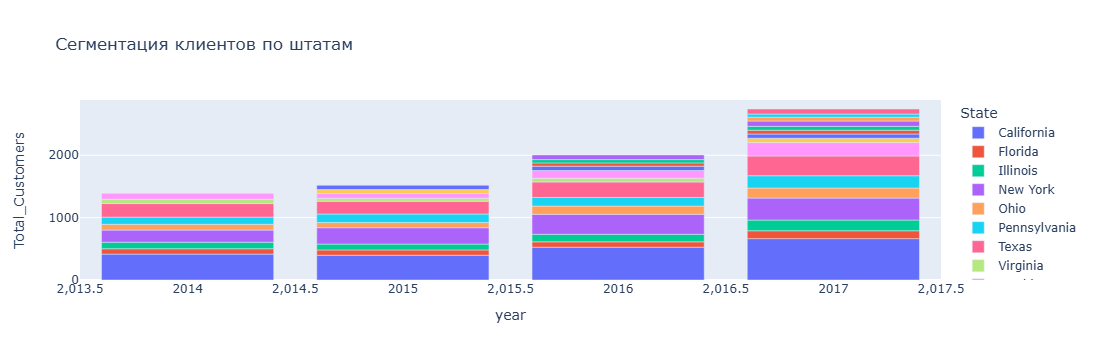

In [49]:
# посмотреть динамику выручки и прибыли по всем сегментам
#State.describe()
State_group = State.groupby(['year', 'State']).agg(Total_Customers=('Customer ID', 'sum')).reset_index()

State_filter = State_group[State_group['Total_Customers'] >= 50] # добавить сортировку
#State_filter['year'].unique()
graf = px.bar(
     State_filter,
     x = 'year',
     y = 'Total_Customers',
     color = 'State',
     title = 'Сегментация клиентов по штатам'
    )

graf.show() # пофиксить нумерацию годов

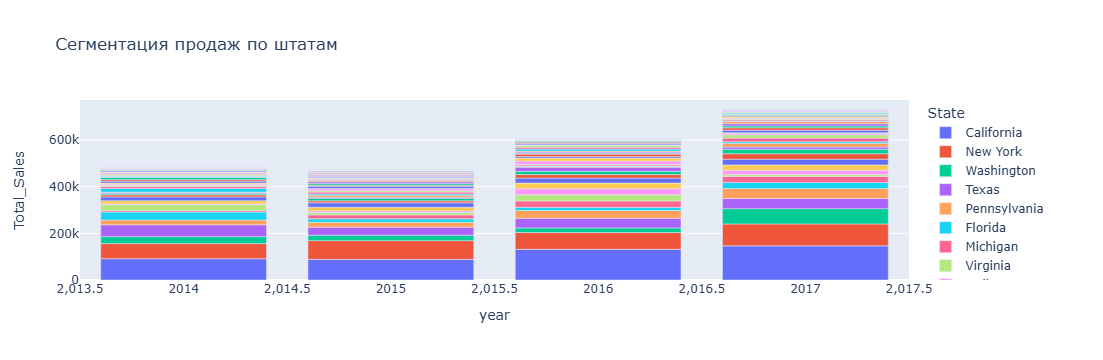

In [50]:
State_group_2 = State.groupby(['year', 'State']).agg(Total_Sales=('Sales', 'sum')).reset_index()
State_group_2_sorted = State_group_2.sort_values('Total_Sales', ascending = False)
graf_2 = px.bar(
     State_group_2_sorted,
     x = 'year',
     y = 'Total_Sales',
     color = 'State',
     title = 'Сегментация продаж по штатам'
    )

graf_2.show()

In [51]:
# сегментация - признак средний чек клиента
Superstore_AOV = Superstore.groupby(['Customer ID']).agg(AOV = ('Sales', 'mean')).sort_values('AOV', ascending = False).reset_index()
#Superstore_AOV.loc[Superstore_AOV['Customer ID'] == 'CG-12520']
Superstore_AOV
#Superstore.loc[Superstore['Customer ID'] == 'CG-12520']

,Customer ID,AOV
0,MW-18235,1751.292000
1,SM-20320,1669.536667
2,TC-20980,1587.684833
3,GT-14635,1558.535333
4,TA-21385,1459.562000
...,...,...
788,SG-20890,9.589200
789,MG-18205,8.369500
790,RS-19870,7.442667
791,LD-16855,5.304000


In [24]:
# удаление колонок
# Superstore = Superstore.drop(['AOV', 'AOV'], axis = 1)
# Superstore

In [52]:
# добавляем расчитанный AOV к основному датасету
Superstore['is_first'] = Superstore.groupby('Customer ID').cumcount() == 0 # определяем первую запись для каждого клиента эта часть ключа

# объединяем средний чек с первой записью
Superstore = Superstore.merge(
    Superstore_AOV,
    how = 'left',
    left_on = ['Customer ID', 'is_first'], # ключ для связи
    right_on=['Customer ID', pd.Series([True]*len(Superstore_AOV))]
)
Superstore = Superstore.drop(['is_first'], axis = 1) # удаляем временную колонку
Superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,year,month,day,Profit Category,AOV
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,Very High,229.756000
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,Very High,NaN
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,Middle,124.387000
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,Lower,173.505033
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,Middle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1,21,Middle,NaN
9990,9991,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2,26,High,NaN
9991,9992,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2,26,High,NaN
9992,9993,CA-2017-121258,2017-02-26,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2,26,High,NaN


In [53]:
#сегментация - признак частота покупок
count_sales = Superstore.groupby('Customer ID').agg(purchases_per_month = ('month', 'count')).reset_index()
count_sales # количество покупок
# purchases_per_month.loc[purchases_per_month['Customer ID'] == 'CG-12520'] для проверки

,Customer ID,purchases_per_month
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [54]:
Superstore.loc[Superstore['Customer ID'] == 'CG-12520'] #для проверки

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,year,month,day,Profit Category,AOV
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016,11,8,Very High,229.756
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2016,11,8,Very High,NaN
5491,5492,CA-2017-164098,2017-01-26,1/27/2017,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160,2017,1,26,Middle,NaN
6877,6878,US-2015-123918,2015-10-15,10/15/2015,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476,2015,10,15,Lower,NaN
6878,6879,US-2015-123918,2015-10-15,10/15/2015,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,Xerox 1986,5.344,1,0.2,1.8704,2015,10,15,Middle,NaN


In [55]:
date = Superstore.loc[:,['Customer ID', 'Order Date']]

max_date = date.groupby('Customer ID').agg(Max_date = ('Order Date', 'max')).reset_index()
min_date = date.groupby('Customer ID').agg(Min_date = ('Order Date', 'min')).reset_index()

period = max_date.merge(
    min_date,
    how = 'left',
    on = 'Customer ID'
)

period

,Customer ID,Max_date,Min_date
0,AA-10315,2017-06-29,2014-03-31
1,AA-10375,2017-12-11,2014-04-21
2,AA-10480,2017-04-15,2014-05-04
3,AA-10645,2017-11-05,2014-06-22
4,AB-10015,2016-11-10,2014-02-18
...,...,...,...
788,XP-21865,2017-11-17,2014-01-20
789,YC-21895,2017-12-26,2014-11-17
790,YS-21880,2017-12-21,2015-01-12
791,ZC-21910,2017-11-06,2014-10-13


In [ ]:
# # добавляем расчитанный AOV к основному датасету
# Superstore['is_first'] = Superstore.groupby('Customer ID').cumcount() == 0 # определяем первую запись для каждого клиента эта часть ключа

# # объединяем средний чек с первой записью
# Superstore = Superstore.merge(
#     Superstore_AOV,
#     how = 'left',
#     left_on = ['Customer ID', 'is_first'], # ключ для связи
#     right_on=['Customer ID', pd.Series([True]*len(Superstore_AOV))]
# )
# Superstore = Superstore.drop(['is_first'], axis = 1) # удаляем временную колонку

In [56]:
period['Period_purchases_for_customer'] = period['Max_date'] - period['Min_date']
period['Period_purchases_for_customer (month)'] = (period['Period_purchases_for_customer']).dt.days / 30 # перевод в месяцы
period = period.drop(['Max_date', 'Min_date', 'Period_purchases_for_customer'], axis = 1) # удаляем ненужные колонки
period # период покупок для каждого клиента

,Customer ID,Period_purchases_for_customer (month)
0,AA-10315,39.533333
1,AA-10375,44.333333
2,AA-10480,35.900000
3,AA-10645,41.066667
4,AB-10015,33.200000
...,...,...
788,XP-21865,46.566667
789,YC-21895,37.833333
790,YS-21880,35.800000
791,ZC-21910,37.333333


In [57]:
pf = count_sales.merge(period, how = 'left', on = 'Customer ID')
pf['pf_month'] = (pf['Period_purchases_for_customer (month)'] / pf['purchases_per_month']).round(3) # частота покупок в месяц для кадого клиента
pf

,Customer ID,purchases_per_month,Period_purchases_for_customer (month),pf_month
0,AA-10315,11,39.533333,3.594
1,AA-10375,15,44.333333,2.956
2,AA-10480,12,35.900000,2.992
3,AA-10645,18,41.066667,2.281
4,AB-10015,6,33.200000,5.533
...,...,...,...,...
788,XP-21865,28,46.566667,1.663
789,YC-21895,8,37.833333,4.729
790,YS-21880,12,35.800000,2.983
791,ZC-21910,31,37.333333,1.204


In [58]:
# добавляем расчитанную частоту покупок к основному датасету
Superstore['is_first'] = Superstore.groupby('Customer ID').cumcount() == 0 # определяем первую запись для каждого клиента эта часть ключа

# объединяем средний чек с первой записью
Superstore = Superstore.merge(
    pf,
    how = 'left',
    left_on = ['Customer ID', 'is_first'], # ключ для связи
    right_on=['Customer ID', pd.Series([True]*len(Superstore_AOV))]
)
#Superstore = Superstore.drop(['AOV_x'], axis = 1) # удаляем временную колонку
#Superstore['AOV'] = Superstore['AOV_x']
#Superstore.info()
Superstore[['Customer ID', 'pf_month', 'AOV']]

,Customer ID,pf_month,AOV
0,CG-12520,3.127,229.756000
1,CG-12520,NaN,NaN
2,DV-13045,2.026,124.387000
3,SO-20335,1.738,173.505033
4,SO-20335,NaN,NaN
...,...,...,...
9989,TB-21400,NaN,NaN
9990,DB-13060,NaN,NaN
9991,DB-13060,NaN,NaN
9992,DB-13060,NaN,NaN


In [59]:
# разделение pf_month и AOV на квантили для визуализации
Superstore_viz = Superstore[['Customer ID', 'pf_month', 'AOV']].copy()

Superstore_viz['quantile_pf_month'] = pd.qcut(
    Superstore_viz['pf_month'],
    q=4,
    labels=['Q1 (Редкие)', 'Q2 (Умеренные)', 'Q3 (Частые)', 'Q4 (VIP)']
)

Superstore_viz['quantile_AOV'] = pd.qcut(
    Superstore_viz['AOV'],
    q=4,
    labels=['Q1 (Экономные)', 'Q2 (Стандартные)', 'Q3 (Премиальные)', 'Q4 (Премиум)']
)

Superstore_viz

,Customer ID,pf_month,AOV,quantile_pf_month,quantile_AOV
0,CG-12520,3.127,229.756000,Q3 (Частые),Q3 (Премиальные)
1,CG-12520,NaN,NaN,NaN,NaN
2,DV-13045,2.026,124.387000,Q2 (Умеренные),Q2 (Стандартные)
3,SO-20335,1.738,173.505033,Q1 (Редкие),Q2 (Стандартные)
4,SO-20335,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9989,TB-21400,NaN,NaN,NaN,NaN
9990,DB-13060,NaN,NaN,NaN,NaN
9991,DB-13060,NaN,NaN,NaN,NaN
9992,DB-13060,NaN,NaN,NaN,NaN


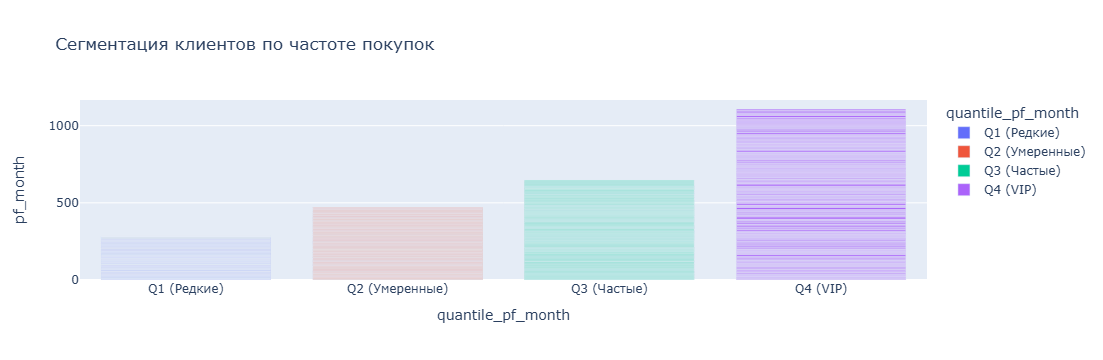

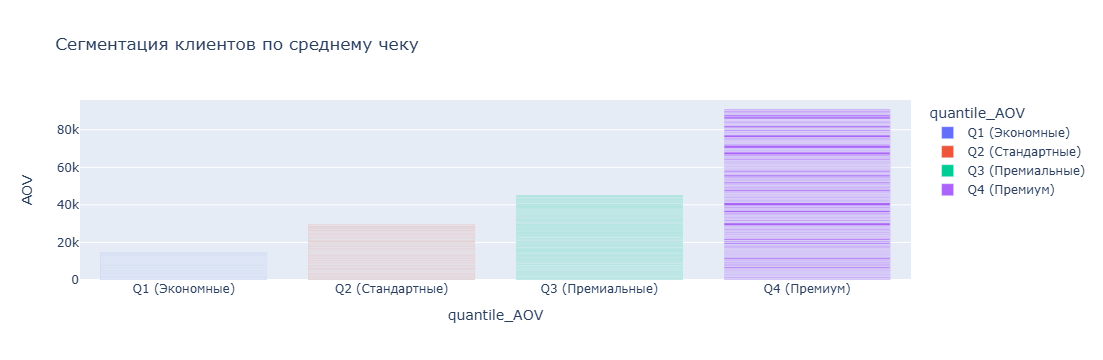

In [60]:
# визуализация квантилей по частоте покупок, визуализация по среднему чеку
graph_pf = px.bar(
     Superstore_viz,
     x = 'quantile_pf_month',
     y = 'pf_month',
     color = 'quantile_pf_month',
     title = 'Сегментация клиентов по частоте покупок',
     category_orders={
        'quantile_pf_month': ['Q1 (Редкие)', 'Q2 (Умеренные)', 'Q3 (Частые)', 'Q4 (VIP)']
    }
    )

graph_AOV = px.bar(
     Superstore_viz,
     x = 'quantile_AOV',
     y = 'AOV',
     color = 'quantile_AOV',
     title = 'Сегментация клиентов по среднему чеку',
     category_orders={
        'quantile_AOV': ['Q1 (Экономные)', 'Q2 (Стандартные)', 'Q3 (Премиальные)', 'Q4 (Премиум)']
     }
    )

graph_pf.show()
graph_AOV.show()